In [1]:
from keras.datasets import cifar100
from keras.models import *
from keras.layers import *
import numpy as np
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import *
from keras.preprocessing import image
from keras import regularizers,optimizers
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch < 2:
        lrate = 0.005
    if epoch > 5:
        lrate = 0.0001
    return lrate

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 58s 0us/step


In [4]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
#image augumentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rotation_range=30,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(x_train)

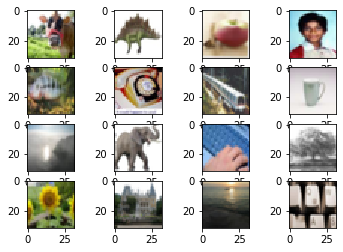

In [6]:
#cofirm train data
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow((X[k]))
            k = k+1
    # show the plot
    plt.show()
show_imgs(x_train[:16])

In [7]:
#modeling
model  = Sequential()
model.add(Conv2D(32,(2,2),padding='same',input_shape=(32,32,3),activation='elu'))
model.add(MaxPool2D(2,2))    
model.add(Conv2D(64, (2, 2), padding='same',activation='elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.rmsprop(lr=0.001, decay=0.00005), metrics=['accuracy'])

#model structure
print(model.summary())

W0315 12:24:59.928038  7200 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0315 12:24:59.972032  7200 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0315 12:24:59.977019  7200 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0315 12:25:00.077839  7200 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0315 12:25:00.191378  7200 deprecation_wrapper.py:119] From C:\Users\Admin\Ana

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [8]:
callbacks = [EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1)]

In [9]:
model.fit(x_train, y_train,epochs=10,validation_split=0.2,verbose=1,callbacks=callbacks)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 181s 5ms/step - loss: 0.0552 - acc: 0.9900 - val_loss: 0.0538 - val_acc: 0.9900
Epoch 2/10
40000/40000 [==============================] - 173s 4ms/step - loss: 0.0539 - acc: 0.9900 - val_loss: 0.0530 - val_acc: 0.9900
Epoch 3/10
40000/40000 [==============================] - 181s 5ms/step - loss: 0.0535 - acc: 0.9900 - val_loss: 0.0522 - val_acc: 0.9900
Epoch 4/10
40000/40000 [==============================] - 187s 5ms/step - loss: 0.0532 - acc: 0.9900 - val_loss: 0.0514 - val_acc: 0.9900
Epoch 5/10
40000/40000 [==============================] - 193s 5ms/step - loss: 0.0526 - acc: 0.9900 - val_loss: 0.0511 - val_acc: 0.9901
Epoch 6/10
40000/40000 [==============================] - 71s 2ms/step - loss: 0.0520 - acc: 0.9900 - val_loss: 0.0501 - val_acc: 0.9901
Epoch 7/10
40000/40000 [==============================] - 77s 2ms/step - loss: 0.0513 - acc: 0.9900 - val_loss: 0.0492 - va

In [10]:
res_acc = model.evaluate(x_test,y_test)

#res_acc: 0.9901830131530762
print("res_acc:",res_acc[1])
#res_acc: 0.043311127352714536
print("res_socre:",res_acc[0])

10000/10000 [==============================] - 6s 621us/step
res_acc: 0.9901820135116577
res_socre: 0.045170080780982974
